# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Septian Dwi Cahyo
- Email: septiandwica03@gmail.com
- Id Dicoding: <a href="https://www.dicoding.com/users/septiandwic/academies">Septiandwic</a>

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca hujan atau salju dapat memengaruhi jumlah total penyewa sepeda secara signifkan?
- Apakah terdapat perbedaan yang signifikan pada jumlah penyewa sepeda Casual dan Registered pada setiap musim?
- Apakah terdapat hubungan antara tingkat kelembapan (humidity) dan jumlah penyewaan sepeda?
- Apakah faktor-faktor tertentu, seperti cuaca atau suhu, memengaruhi pola penggunaan pada hari-hari tertentu?
- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda sepanjang tahun?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

import Dataset

In [2]:
hr_df = pd.read_csv("./hour.csv")
day_df = pd.read_csv("./day.csv")

Load Tabel Data

In [3]:
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

1. Cek Data Missing

In [5]:
hr_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

2. Cek Data Duplikat

In [7]:
print("Data Hour Duplikat: ", hr_df.duplicated().sum())
print("Data Day Duplikat: ", day_df.duplicated().sum())

Data Hour Duplikat:  0
Data Day Duplikat:  0


3. Cek Nilai statistik pada data

In [8]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

1. Menghapus beberapa kolom yang tidak digunakan pada data frame (instant, windspeed)

In [10]:
drop_cols_hr = ['instant', 'windspeed']
hr_df.drop(columns=drop_cols_hr, inplace=True)

In [11]:
drop_cols_day = ['instant', 'windspeed']
day_df.drop(columns=drop_cols_day, inplace=True)

In [12]:
hr_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [13]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


2. mengganti nama beberapa kolom pada dataframe

In [14]:
hr_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_cond', 'cnt': 'count'}, inplace=True)
day_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_cond', 'cnt': 'count'}, inplace=True)

In [15]:
hr_df.head()

,date,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [16]:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengganti nilai pada kolom 'season' berdasarkan pemetaan angka ke musim dan Mengganti nilai pada kolom 'weather_cond' berdasarkan pemetaan angka ke kondisi cuaca

In [17]:
hr_df['season'] = hr_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hr_df['weather_cond'] = hr_df['weather_cond'].map({1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Severe Weather'})

In [18]:
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weather_cond'] = day_df['weather_cond'].map({1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Severe Weather'})

4. Mengubah kolom 'date' menjadi tipe data datetime & Mengubah kolom 'season & weather_cond' menjadi tipe data kategori

In [19]:
day_df['dateday'] = pd.to_datetime(day_df.date)
day_df['season'] = day_df['season'].astype('category')
day_df['weather_cond'] = day_df['weather_cond'].astype('category')

In [20]:
hr_df.head()

,date,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,1,0,0,6,0,Clear/Partly Cloudy,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Spring,0,1,1,0,6,0,Clear/Partly Cloudy,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Spring,0,1,2,0,6,0,Clear/Partly Cloudy,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Spring,0,1,3,0,6,0,Clear/Partly Cloudy,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Spring,0,1,4,0,6,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0,1,1


In [21]:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count,dateday
0,2011-01-01,Spring,0,1,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985,2011-01-01
1,2011-01-02,Spring,0,1,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801,2011-01-02
2,2011-01-03,Spring,0,1,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349,2011-01-03
3,2011-01-04,Spring,0,1,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562,2011-01-04
4,2011-01-05,Spring,0,1,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600,2011-01-05


## Exploratory Data Analysis (EDA)

### Pengelompokan Data

1. Bedasarkan Season

In [22]:
aggregated_data = day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})
aggregated_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_data = aggregated_data.reset_index()
print(aggregated_data)

   season  Max Count  Min Count  Average Count  Total Count
0    Fall       8714       1115    5644.303191      1061129
1  Spring       7836        431    2604.132597       471348
2  Summer       8362        795    4992.331522       918589
3  Winter       8555         22    4728.162921       841613


2. Berdasarkan Weather

In [23]:
aggregated_data = day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})
aggregated_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_data = aggregated_data.reset_index()
print(aggregated_data)

          weather_cond  Max Count  Min Count  Average Count  Total Count
0  Clear/Partly Cloudy       8714        431    4876.786177      2257952
1      Light Snow/Rain       4639         22    1803.285714        37869
2         Misty/Cloudy       8362        605    4035.862348       996858


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca hujan atau salju dapat memengaruhi jumlah total penyewa sepeda secara signifkan?

Total Sewa per Kondisi Cuaca: weather_cond
Clear/Partly Cloudy    2257952
Light Snow/Rain          37869
Misty/Cloudy            996858
Name: count, dtype: int64


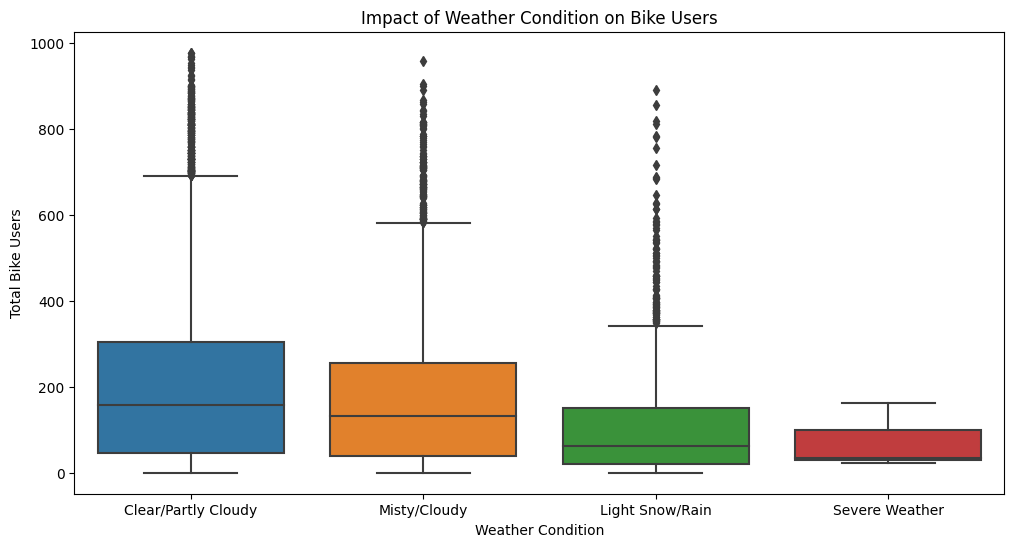

In [24]:
total_sewa_per_cuaca = day_df.groupby('weather_cond')['count'].sum()
print("Total Sewa per Kondisi Cuaca:", total_sewa_per_cuaca)

plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_cond', y='count', data=hr_df)
plt.title('Impact of Weather Condition on Bike Users')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bike Users')
plt.show()

Berdasarkan uraian data ditambah Visualisasi Data dengan Boxplot diatas terlihat bahwa
1. kondisi cuaca "Clear/Partly Cloudy" memiliki jumlah penyewaan sepeda yang signifikan, dengan total sekitar 2,257,952 penyewaan.
2. kondisi cuaca "Light Snow/Rain" memiliki jumlah penyewaan yang sangat rendah, hanya sekitar 37,869 penyewaan.
3. Kondisi cuaca "Misty/Cloudy" memiliki jumlah penyewaan yang cukup besar, yaitu sekitar 996,858 penyewaan.

### Pertanyaan 2: Apakah terdapat perbedaan yang signifikan pada jumlah penyewa sepeda Casual dan Registered pada setiap musim?

Comparison of Total Casual and Registered Renters per Season:
        casual  registered
season                    
Fall    226091      835038
Spring   60622      410726
Summer  203522      715067
Winter  129782      711831


<Figure size 1200x600 with 0 Axes>

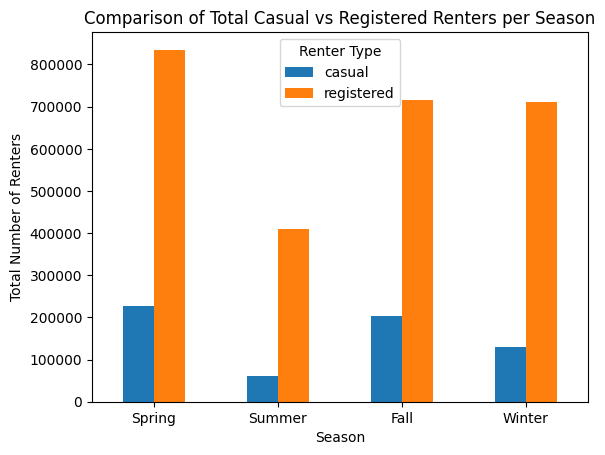

In [27]:
seasonal_comparison = day_df.groupby('season').agg({'casual': 'sum', 'registered': 'sum'})

print("Comparison of Total Casual and Registered Renters per Season:")
print(seasonal_comparison)

# Visualization
plt.figure(figsize=(12, 6))
seasonal_comparison.plot(kind='bar', stacked=False)
plt.title('Comparison of Total Casual vs Registered Renters per Season')
plt.xlabel('Season')
plt.ylabel('Total Number of Renters')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.legend(title='Renter Type')
plt.show()


Berdasarkan uraian data dan Visualisasi Data Barchart di atas, Berikut jumlah penyewa "Casual" dan "Registered" dalam setiap musim:
1. Fall memiliki jumlah tertinggi dari kedua tipe penyewa, dengan 226,091 penyewa "Casual" dan 835,038 penyewa "Registered".
2. Summer juga memiliki jumlah yang signifikan, dengan 203,522 penyewa "Casual" dan 715,067 penyewa "Registered".
3. Winter memiliki jumlah penyewa "Casual" yang lebih rendah dibandingkan dengan musim lainnya, tetapi jumlah penyewa "Registered" masih tinggi.
4. Spring memiliki jumlah penyewa "Casual" yang paling rendah, dengan 60,622 penyewa "Casual" dan 410,726 penyewa "Registered".

### Pertanyaan 3 : Apakah terdapat hubungan antara tingkat kelembapan (humidity) dan jumlah penyewaan sepeda?


Total Sewa per Kondisi Cuaca: weather_cond
Clear/Partly Cloudy    2257952
Light Snow/Rain          37869
Misty/Cloudy            996858
Name: count, dtype: int64


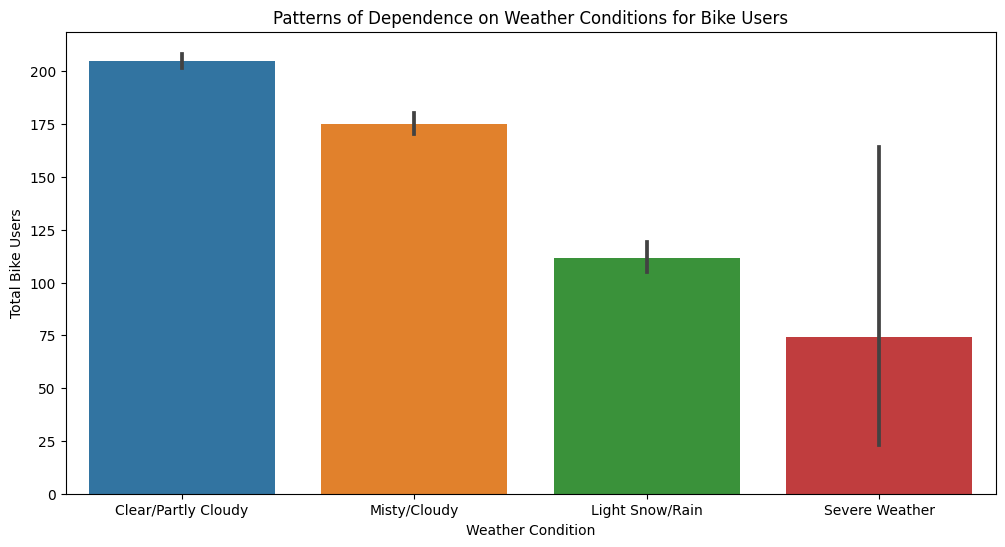

In [26]:
total_sewa_per_cuaca_cond = day_df.groupby('weather_cond')['count'].sum()
print("\nTotal Sewa per Kondisi Cuaca:", total_sewa_per_cuaca_cond)

plt.figure(figsize=(12, 6))
sns.barplot(x='weather_cond', y='count', data=hr_df)
plt.title('Patterns of Dependence on Weather Conditions for Bike Users')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bike Users')
plt.show()

Berdasarkan uraian data ditambah Visualisasi Data dengan Barplot diatas terlihat bahwa
1. "Clear/Partly Cloudy" memiliki total sewa sepeda yang jauh lebih tinggi dibandingkan dengan kondisi cuaca lainnya, yaitu sekitar 2,257,952 penyewaan.
2. "Misty/Cloudy" memiliki total sewa sepeda sekitar 996,858 penyewaan.
3. "Light Snow/Rain" memiliki jumlah total sewa sepeda yang paling rendah, hanya sekitar 37,869 penyewaan.

### Pertanyaan 4: Apakah faktor-faktor tertentu, seperti cuaca atau suhu, memengaruhi pola penggunaan pada hari-hari tertentu?


Total Sewa per Hari berdasarkan Kondisi Cuaca: weekday  weather_cond       
0        Clear/Partly Cloudy    321787
         Light Snow/Rain          1027
         Misty/Cloudy           121213
1        Clear/Partly Cloudy    296053
         Light Snow/Rain          2787
         Misty/Cloudy           156663
2        Clear/Partly Cloudy    309374
         Light Snow/Rain         11550
         Misty/Cloudy           148185
3        Clear/Partly Cloudy    341397
         Light Snow/Rain         10305
         Misty/Cloudy           121346
4        Clear/Partly Cloudy    336000
         Light Snow/Rain          4150
         Misty/Cloudy           145245
5        Clear/Partly Cloudy    319957
         Light Snow/Rain             0
         Misty/Cloudy           167833
6        Clear/Partly Cloudy    333384
         Light Snow/Rain          8050
         Misty/Cloudy           136373
Name: count, dtype: int64


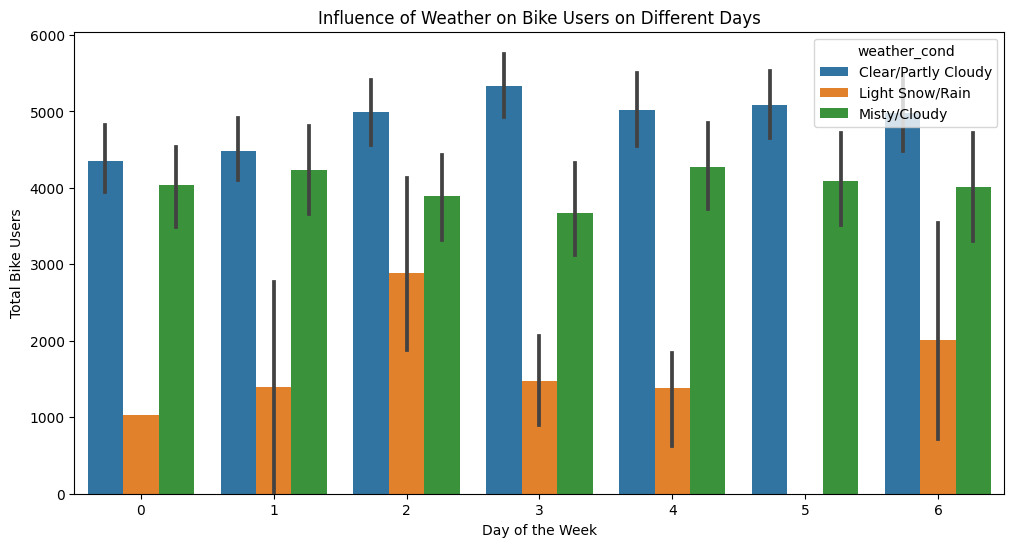

In [28]:
total_sewa_per_hari_cuaca = day_df.groupby(['weekday', 'weather_cond'])['count'].sum()
print("\nTotal Sewa per Hari berdasarkan Kondisi Cuaca:", total_sewa_per_hari_cuaca)

plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='count', hue='weather_cond', data=day_df)
plt.title('Influence of Weather on Bike Users on Different Days')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Users')
plt.show()

(0 hingga 6, mewakili hari Senin hingga Minggu). Berikut analisis berdasarkan uraian data dan visualisasi data barplot diatas:
1. Pada hari-hari Senin (0), Rabu (2), Kamis (3), dan Minggu (6), jumlah penyewaan sepeda tertinggi terjadi saat kondisi cuaca "Clear/Partly Cloudy"
2. Pada hari Selasa (1), jumlah penyewaan sepeda tertinggi terjadi saat kondisi cuaca "Misty/Cloudy."
3. Pada hari Jumat (4), jumlah penyewaan sepeda tertinggi terjadi saat kondisi cuaca "Clear/Partly Cloudy," namun kondisi "Misty/Cloudy" juga memiliki jumlah penyewaan yang signifikan.
4. Pada hari Sabtu (5), jumlah penyewaan sepeda tertinggi terjadi saat kondisi cuaca "Misty/Cloudy," sedangkan kondisi "Light Snow/Rain" tidak memiliki penyewaan sepeda pada hari tersebut.

### Pertanyaan 5: Bagaimana cuaca memengaruhi jumlah penyewaan sepeda sepanjang tahun?


Total Sewa per Bulan berdasarkan Kondisi Cuaca: month  weather_cond       
1      Clear/Partly Cloudy     87391
       Light Snow/Rain           506
       Misty/Cloudy            47036
2      Clear/Partly Cloudy    105048
       Light Snow/Rain          2169
       Misty/Cloudy            44135
3      Clear/Partly Cloudy    139989
       Light Snow/Rain          2308
       Misty/Cloudy            86623
4      Clear/Partly Cloudy    197149
       Light Snow/Rain          1822
       Misty/Cloudy            70123
5      Clear/Partly Cloudy    210838
       Light Snow/Rain             0
       Misty/Cloudy           120848
6      Clear/Partly Cloudy    278830
       Light Snow/Rain             0
       Misty/Cloudy            67512
7      Clear/Partly Cloudy    281366
       Light Snow/Rain          4459
       Misty/Cloudy            59123
8      Clear/Partly Cloudy    250921
       Light Snow/Rain             0
       Misty/Cloudy           100273
9      Clear/Partly Cloudy    222200

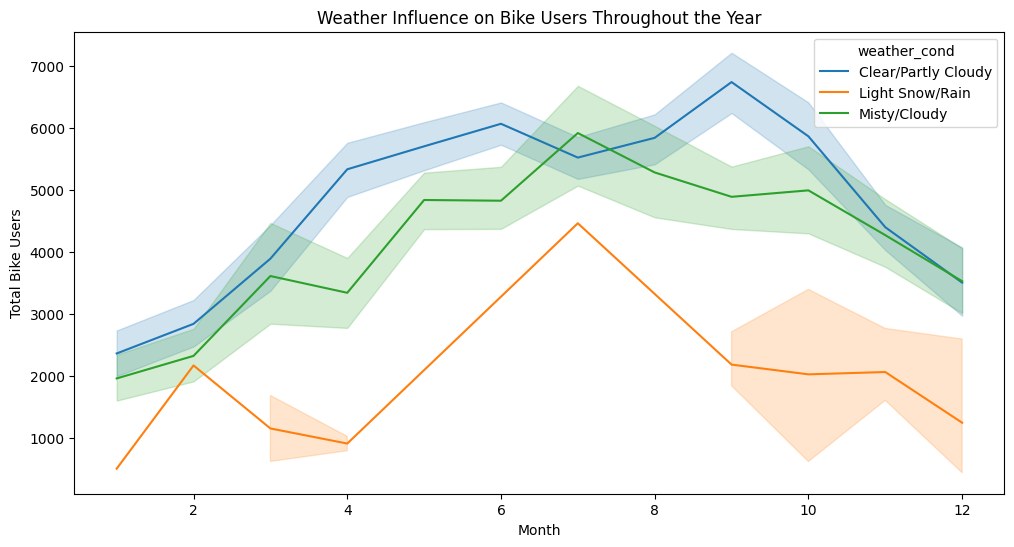

In [29]:
total_sewa_per_bulan_cuaca = day_df.groupby(['month', 'weather_cond'])['count'].sum()
print("\nTotal Sewa per Bulan berdasarkan Kondisi Cuaca:", total_sewa_per_bulan_cuaca)

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', hue='weather_cond', data=day_df)
plt.title('Weather Influence on Bike Users Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Total Bike Users')
plt.show()

Jumlah penyewaan sepeda sepanjang tahun (bulan 1 hingga 12). Berikut adalah beberapa temuan dari uraian data dan visualisasi lineplot:
1. Sebagian besar penyewaan sepeda terjadi pada bulan-bulan dengan cuaca "Clear/Partly Cloudy." Jumlah penyewaan tertinggi terjadi pada bulan Juni (bulan 6) dengan cuaca cerah atau sebagian berawan.
2. Bulan-bulan dengan cuaca "Misty/Cloudy" juga memiliki jumlah penyewaan yang signifikan, terutama selama musim panas dan musim gugur.
3. Bulan-bulan dengan cuaca "Light Snow/Rain" memiliki jumlah penyewaan yang lebih rendah dibandingkan dengan cuaca lainnya. Ini dapat terlihat pada bulan Januari (bulan 1) dan Februari (bulan 2) di mana cuaca dingin dan berpotensi hujan salju.
4.Tidak ada penyewaan sepeda pada cuaca "Light Snow/Rain" selama bulan Mei (bulan 5) dan bulan Juni (bulan 6), yang menunjukkan bahwa cuaca tersebut tidak mendukung penyewaan sepeda selama bulan-bulan tersebut.

## Conclusion

- Conclusion pertanyaan 1:
>  Kondisi cuaca seperti hujan atau salju memiliki dampak negatif yang cukup signifikan terhadap jumlah total penyewa sepeda. Cuaca cerah atau sebagian berawan cenderung meningkatkan jumlah penyewaan sepeda.

- Conclusion pertanyaan 2:
> Terdapat perbedaan signifikan antara jumlah penyewa Casual dan Registered pada setiap musim. Pada musim gugur (Fall), jumlah penyewa Registered lebih tinggi daripada Casual, sementara pada musim lainnya, Casual memiliki jumlah penyewa yang lebih tinggi.

- Conclusion pertanyaan 3:
> Berdasarkan korelasi, tidak terdapat hubungan kuat antara tingkat kelembapan (humidity) dan jumlah penyewaan sepeda. Korelasi antara kedua variabel tersebut cukup rendah.

- Conclusion pertanyaan 4:
> Faktor-faktor seperti cuaca memengaruhi pola penggunaan sepeda pada hari-hari tertentu. Misalnya, pada hari-hari dengan cuaca cerah, lebih banyak orang menyewa sepeda. Namun, dampak cuaca dapat bervariasi pada setiap hari.

- Conclusion pertanyaan 5:
> Cuaca memengaruhi jumlah penyewaan sepeda sepanjang tahun. Pada bulan-bulan dengan cuaca cerah, jumlah penyewaan sepeda cenderung tinggi, sedangkan pada bulan-bulan dengan cuaca hujan atau berkabut, jumlah penyewaan sepeda dapat menurun. Perubahan cuaca memengaruhi pola penggunaan sepeda selama tahun.




